In [15]:
import os 
import pandas as pd
import time

#Prep:----------------------------------
os.chdir('/home/ekaterina/Documents/appaloosa/stars_shortlist/share')
today = time.strftime("%d_%b_%Y", time.gmtime())
locs = [('M67','M67_run_09_cum_FFD.csv',4.0),
        ('M44','M44_run_09_cum_FFD.csv',0.794),
        ('NGC_1647','NGC_1647_run_01_cum_FFD.csv',0.145),
        ('Pleiades','Pleiades_run_01_cum_FFD.csv',0.120)]
frames = []
for (key, value,age) in locs:
    df = pd.read_csv(value,
                     usecols = ['Tmax','Tmin','alpha',
                                'alpha_err','beta','beta_err',
                                'minenerg','maxenerg'],
                     )
    frames.append(df)
res = pd.concat(frames, keys=[x[2] for x in locs])
res = res.reset_index()
res = res.drop('level_1',axis=1)
res = res.rename(index=str, columns={'level_0':'age'})
ages = {4.0:'M67',0.794:'M44',0.145:'NGC_1647',0.120:'Pleiades'}
res['cluster'] = [ages[i] for i in res.age]
res = res.dropna(how='any')
#Transform alpha to conventional value
res.alpha = -res.alpha+1.
#res = res[(res.Tmax==7000) & (res.Tmin ==3000)]
#Prep end. ------------------------------

In [16]:
#CHECK THESE PARAMETERS before proceeding
res = res[(res.Tmax-res.Tmin >= 1000)]
res = res[res.alpha<3.]
res

,age,Tmax,Tmin,alpha,alpha_err,beta,beta_err,maxenerg,minenerg,cluster
7,4.000,5500.0,4500.0,2.081846,0.077412,35.009027,2.539037,2.684517e+33,1.000000e+32,M67
8,4.000,7000.0,5500.0,2.033654,0.043879,33.489325,1.441711,6.680729e+33,1.000000e+32,M67
10,4.000,7000.0,3000.0,2.111297,0.039413,35.991767,1.293864,6.680729e+33,1.000000e+32,M67
11,0.794,5500.0,4500.0,1.832276,0.031645,26.812050,1.019277,1.625611e+33,1.000000e+30,M44
12,0.794,7000.0,5500.0,1.995867,0.026902,33.057827,0.882527,8.392918e+33,1.000000e+30,M44
13,0.794,4500.0,3000.0,1.734759,0.012741,23.396516,0.401852,1.842988e+33,1.000000e+30,M44
14,0.794,7000.0,3000.0,1.582028,0.013254,19.008253,0.427697,8.392918e+33,1.000000e+30,M44
23,0.145,5500.0,4500.0,1.681462,0.009785,21.529833,0.312758,7.695544e+33,1.000000e+31,NGC_1647
24,0.145,7000.0,5500.0,1.218060,0.020682,6.571931,0.679622,1.847480e+35,1.000000e+31,NGC_1647
25,0.145,4500.0,3000.0,1.679053,0.043444,20.847847,1.378446,5.134369e+32,1.000000e+31,NGC_1647


### Plot alpha(t)

        minenerg      maxenerg   cluster    Tmin    Tmax
13  1.000000e+30  1.842988e+33       M44  3000.0  4500.0
37  1.000000e+30  1.398795e+33  Pleiades  3000.0  4500.0
25  1.000000e+31  5.134369e+32  NGC_1647  3000.0  4500.0
        minenerg      maxenerg   cluster    Tmin    Tmax
14  1.000000e+30  8.392918e+33       M44  3000.0  7000.0
38  1.000000e+30  6.164359e+34  Pleiades  3000.0  7000.0
26  1.000000e+31  1.847480e+35  NGC_1647  3000.0  7000.0
10  1.000000e+32  6.680729e+33       M67  3000.0  7000.0
        minenerg      maxenerg   cluster    Tmin    Tmax
11  1.000000e+30  1.625611e+33       M44  4500.0  5500.0
35  1.000000e+30  1.033859e+34  Pleiades  4500.0  5500.0
23  1.000000e+31  7.695544e+33  NGC_1647  4500.0  5500.0
7   1.000000e+32  2.684517e+33       M67  4500.0  5500.0
        minenerg      maxenerg   cluster    Tmin    Tmax
12  1.000000e+30  8.392918e+33       M44  5500.0  7000.0
36  1.000000e+30  6.164359e+34  Pleiades  5500.0  7000.0
24  1.000000e+31  1.847480e+35 

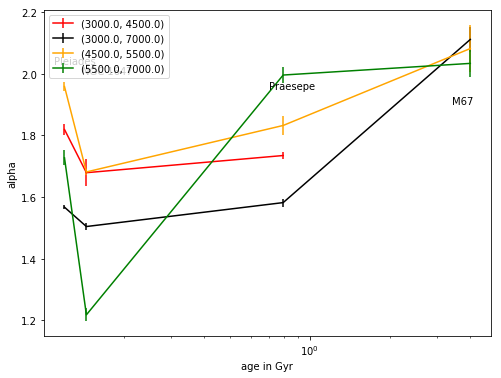

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def colors(mini, maxi):
    cmin = {3000:'maroon',3500:'tomato',4000:'coral',
            4500:'gold',5000:'lime',5500:'darkgreen',
            6000: 'c',6500:'midnightblue'}
    if (mini==3000.) & (maxi==7000.):
        return 'black'
    elif (mini==3000.) & (maxi==4500.):
        return 'red'
    elif (mini==4500.) & (maxi==5500.):
        return 'orange'
    elif (mini==5500.) & (maxi==7000.):
        return 'green'
    else:
        return cmin[mini]
    
fig, ax = plt.subplots(figsize=(8,6))
for label, df in res.groupby(['Tmin','Tmax']):
    df.plot(x='age',y='alpha',yerr='alpha_err',
                 kind='line',logx=True, ax=ax,
                 markersize=100,
                 label=label, color=colors(label[0],label[1]))
    print(df[['minenerg','maxenerg','cluster','Tmin','Tmax']].sort_values(by='minenerg'))

plt.xlabel('age in Gyr')
plt.ylabel('alpha')
plt.text(x=0.11,y=2.03,s='Pleiades')
plt.text(x=0.14,y=2.0,s='NGC 1647')
plt.text(x=0.7,y=1.95,s='Praesepe')
plt.text(x=3.4,y=1.9,s='M67')
plt.legend()
#plt.savefig('/home/ekaterina/Documents/appaloosa/stars_shortlist/share/dated/{}_alpha.jpg'.format(today),dpi=300)

### Plot beta(t)

3000.0
3000.0
4500.0
5500.0


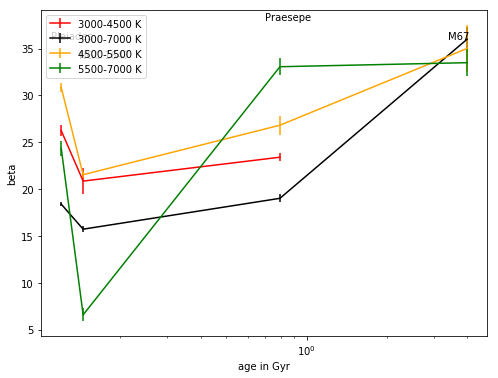

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in res.groupby(['Tmin','Tmax']):
    df.plot(x='age',y='beta',yerr='beta_err',
                 kind='line', ax=ax,
                 markersize=100,logx=True,
                 label='{:.0f}-{:.0f} K'.format(label[0],label[1]), color=colors(label[0],label[1]))
    print(label[0])
plt.xlabel('age in Gyr')
plt.ylabel('beta')
plt.text(x=0.11,y=36,s='Pleiades')
plt.text(x=0.14,y=34,s='NGC 1647')
plt.text(x=0.7,y=38,s='Praesepe')
plt.text(x=3.4,y=36,s='M67')
plt.legend()
plt.savefig('/home/ekaterina/Documents/appaloosa/stars_shortlist/share/dated/{}_beta.jpg'.format(today),dpi=300)

### Plot total energy, total number of flares per cluster

In [12]:
os.chdir('/home/ekaterina/Documents/appaloosa/stars_shortlist')
locs2 = [('NGC_1647','NGC_1647/results/run_01/clusterenergies.csv',.145),
         ('Pleiades','Pleiades/results/run_01/clusterenergies.csv',0.120),
         ('M44','M44/results/run_09/clusterenergies.csv',0.8),
         ('M67','M67/results/run_09/clusterenergies.csv',4.0)]
Tlims = [(3000,4500,'red'),(4500,5500,'orange'),(5500,7000,'green'),(3000,7000,'black')]

dats = []
for Tmin, Tmax, color in Tlims:
    for (name, value, age) in locs2:
        df = pd.read_csv(value,
                         usecols = ['clustered','clusterederr','clusterenergy',
                                    'clusterenergy_err','rel_energ_err','Teff',
                                    'stars_in_bin','Tmin','Tmax'],
                         )
        #select color bin:
        df = df[(df.Tmin == Tmin) & (df.Tmax == Tmax)]
        #check if correct
        #print(df.stars_in_bin)
        if (df.stars_in_bin != df.stars_in_bin.iloc[0]).any(): 
            raise ValueError('The number of stars in your bin is ambiguous.')
        #normalization constant
        n_stars = df.stars_in_bin.iloc[0]
        dats.append([age, n_stars,
                    np.sqrt((df.clusterenergy_err**2).sum())/n_stars,
                    df.clusterenergy.sum()/n_stars, 
                    df.shape[0]/n_stars,
                    df.shape[0],
                    Tmin,Tmax]
                    )
dats = np.asarray(dats) 
data = pd.DataFrame(dats, columns=['age','n_stars',
                                   'tot_en_err','tot_en',
                                   'tot_flares_p_star','tot_flares',
                                   'Tmin','Tmax'])
data['tot_flares_p_star_err'] = np.sqrt(data.tot_flares_p_star)
data.sort_values(by='age').head()

,age,n_stars,tot_en_err,tot_en,tot_flares_p_star,tot_flares,Tmin,Tmax,tot_flares_p_star_err
1,0.120,63.0,2.865192e+33,2.984129e+34,18.238095,1149.0,3000.0,4500.0,4.270608
5,0.120,67.0,8.717508e+31,8.321855e+32,3.940299,264.0,4500.0,5500.0,1.985019
9,0.120,25.0,1.072107e+33,1.746723e+34,4.720000,118.0,5500.0,7000.0,2.172556
13,0.120,155.0,1.177933e+33,1.530605e+34,9.877419,1531.0,3000.0,7000.0,3.142836
0,0.145,27.0,3.059921e+31,3.135890e+32,1.370370,37.0,3000.0,4500.0,1.170628


3000.0
3000.0
4500.0
5500.0


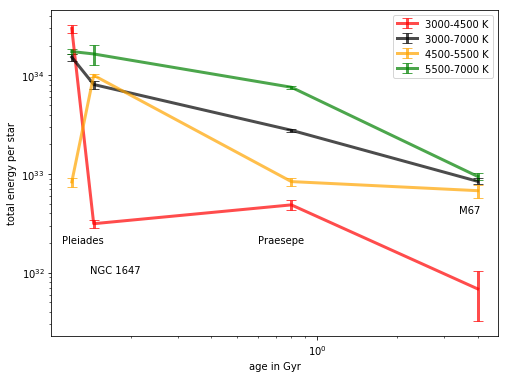

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in data.groupby(['Tmin','Tmax']):
    df = df.sort_values(by='age')
    df.plot(x='age',y='tot_en',yerr='tot_en_err',
                 kind='line', ax=ax,linewidth=3,alpha=0.7,
                 markersize=100,loglog=True,capsize=5,
                 label='{:.0f}-{:.0f} K'.format(label[0],label[1]), color=colors(label[0],label[1]))
    print(label[0])
plt.xlabel('age in Gyr')
plt.ylabel('total energy per star')
plt.text(x=0.11,y=2e32,s='Pleiades')
plt.text(x=0.14,y=1e32,s='NGC 1647')
plt.text(x=0.6,y=2e32,s='Praesepe')
plt.text(x=3.4,y=4e32,s='M67')
plt.legend()
plt.savefig('share/dated/{}_tot_en_color_bins.jpg'.format(today),dpi=300)

3000.0
3000.0
4500.0
5500.0


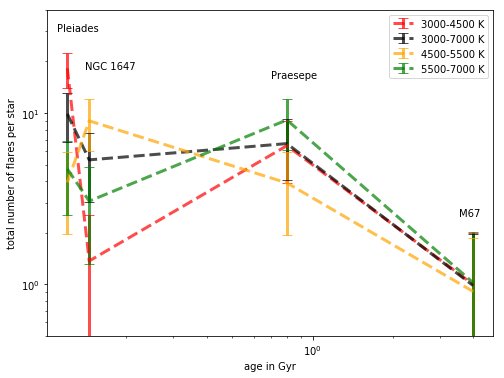

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in data.groupby(['Tmin','Tmax']):
    df = df.sort_values(by='age')
    df.plot(x='age',y='tot_flares_p_star',yerr='tot_flares_p_star_err',
                 kind='line', ax=ax,capsize=5,
                 markersize=50,loglog=True,alpha=0.7,
                linewidth=3,
                 linestyle='dashed',
                 label='{:.0f}-{:.0f} K'.format(label[0],label[1]), color=colors(label[0],label[1]))
    print(label[0])
plt.xlabel('age in Gyr')
plt.ylabel('total number of flares per star')
plt.ylim(5e-1,4e1)
plt.text(x=0.11,y=30,s='Pleiades')
plt.text(x=0.14,y=18,s='NGC 1647')
plt.text(x=0.7,y=16,s='Praesepe')
plt.text(x=3.55,y=2.5,s='M67')
plt.legend()
plt.savefig('share/dated/{}_tot_flares_color_bins.jpg'.format(today),dpi=300)